# Question 1(c)

In [1]:
import numpy as np
import time

In [2]:
# For simplycity we generate A with random integer entries in [-100, 100]
def generate_matrix(n):
    A = np.random.random_integers(-100,100,(n, n))
    return A

# This function compute 1-norm of A
def norm1(A):
    A = np.absolute(A)
    return np.max(np.sum(A, axis = 0))

# This function compute infinity-norm of A
def norminf(A):
    A = np.absolute(A)
    return np.max(np.sum(A, axis = 1))

# Compute sizes
sizes = [100]
for i in range(7):
    sizes.append(sizes[-1]*2)

# Outcome
for n in sizes:
    A = generate_matrix(n)
    start = time.time()
    norm_1 = norm1(A)
    norm_inf = norminf(A)
    stop = time.time()
    time_cost = stop-start
    print('size', n, 'cost time', time_cost, 'to calculate 1-norm and infinity-norm')

/Users/stella/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(-100, 100 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


size 100 cost time 0.00032782554626464844 to calculate 1-norm and infinity-norm
size 200 cost time 0.0007700920104980469 to calculate 1-norm and infinity-norm
size 400 cost time 0.0008869171142578125 to calculate 1-norm and infinity-norm
size 800 cost time 0.005605220794677734 to calculate 1-norm and infinity-norm
size 1600 cost time 0.018037796020507812 to calculate 1-norm and infinity-norm
size 3200 cost time 0.08250594139099121 to calculate 1-norm and infinity-norm
size 6400 cost time 0.4222288131713867 to calculate 1-norm and infinity-norm
size 12800 cost time 1.6609561443328857 to calculate 1-norm and infinity-norm


In [ ]:
## We may roughly say that the calculation time increases by a factor of 4 when the matrix size doubles

# Question 4

In [5]:
import matplotlib.pyplot as plt


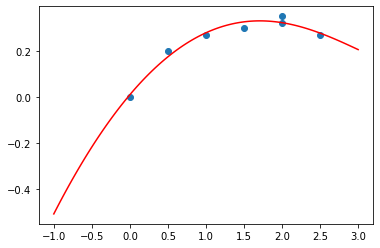

In [9]:
# Initialization
A = np.array([[np.exp(0),0,0,1],
             [np.exp(0.5),0.5**2,0.5,1],
             [np.exp(1),1,1,1],
              [np.exp(1.5),1.5**2,1.5,1],
             [np.exp(2),2**2,2,1],
             [np.exp(2),2**2,2,1],
             [np.exp(2.5),2.5**2,2.5,1]])

b = np.array([0, 0.2, 0.27, 0.3, 0.32, 0.35, 0.27])

# Solve the linear system
solution = np.linalg.solve(A.T@A, A.T@b)

a,b,c,d = solution[0],solution[1],solution[2],solution[3]


plt.figure()

# Plot the function
x = np.linspace(-1,3,100)
y = a*np.exp(x)+b*x**2+c*x+d
plt.plot(x, y,'r')

# Plot the data
datax = [0, 0.5, 1, 1.5, 2, 2, 2.5]
datay = [0, 0.2, 0.27, 0.3, 0.32, 0.35, 0.27]
plt.scatter(datax, datay)

plt.show()

# Question 5

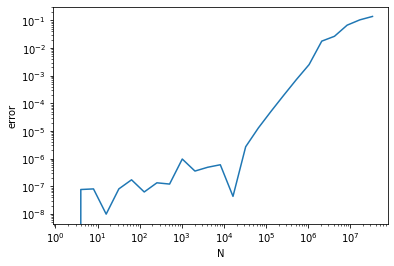

In [40]:
import scipy.special

# Digamma special function to calculate Harmonic sum
def h_digmma(n):
    return scipy.special.digamma(n+1) - scipy.special.digamma(1)


# To calculate Harmonic sum
def harmonic(n):
    result = np.single(0)
    for i in range(1, n+1):
        result += np.single(1)/np.single(i)
    return result
        
# Calculate error
def error(h, h_d):
    return abs(h - h_d)/abs(h_d)

# Run the function for the Ns and calculate the errors
N = [2**i for i in range(1, 31)]

errors = [error(harmonic(n), h_digmma(n)) for n in N[:25]]

# Plot, using double-logarithmic plot, the relative error, as a function of N
plt.figure()
plt.loglog(N[:25], errors)
plt.xlabel('N')
plt.ylabel('error')
plt.show()

In [ ]:
## For convenience, we only calculate the first 25 values of N; otherwise it takes too much time to execute

# (b) Start summing from the smallest element

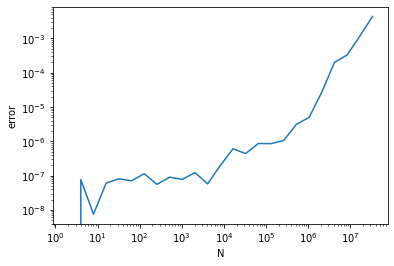

In [41]:
def harmonic_new(n):
    summ = np.single(0)
    for i in range(n, 0, -1):
        summ += np.single(1)/np.single(i)
    return summ

errors2 = [error(harmonic_new(n), h_digmma(n)) for n in N[:25]]

plt.figure()
plt.loglog(N[:25], errors2)
plt.xlabel('N')
plt.ylabel('error')
plt.show()

forward summation (shown in blue color): 1+1/2+1/3+...+1/n
backward summation (shown in red color): 1/n+1/(n-1)+...+1/2+1


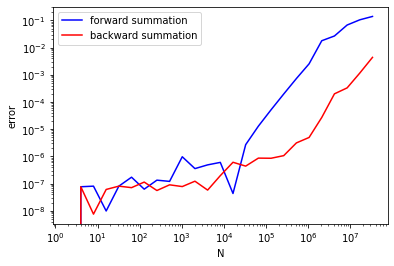

In [42]:
## Let's put the two together to compare the error

plt.figure()
plt.loglog(N[:25], errors,'b', label='forward summation')
plt.loglog(N[:25], errors2,'r', label='backward summation')
plt.xlabel('N')
plt.ylabel('error')
plt.legend()
print('forward summation (shown in blue color): 1+1/2+1/3+...+1/n')
print('backward summation (shown in red color): 1/n+1/(n-1)+...+1/2+1')
plt.show()